## 컨볼루션(Convolution)
* 배열 X와 W가 있을때 W를 뒤집은 W<sup>r</sup>배열에서, X와 W의 각 원소를 곱하고 더하는 연산을 진행한다.
* W<sup>r</sup>은 X를 전체 순회하며 위와 같은 연산을 진행한다.
* 딥러닝 패키지들은 합성곱을 구현할때 합성곱이 아닌 교차 상관(cross-correlation)을 사용한다.
* 교차 상관은 계산법은 동일하지만 W<sup>r</sup>이 아닌 원래 W를 사용한다.
  * 합성곱 신경망의 가중치 배열은 무작위로 초기화 되어 있다. 따라서 가중치를 뒤집어서 합성곱을 적용하던지 뒤집지 않고 교차 상관을 적용하던지 상관이 없다.

## 패딩(Padding)과 스트라이드(stride)
* 패딩(padding)은 원본 배열의 양 끝에 빈 원소를 추가하는 것을 말한다.
* 스트라이드(stride)는 미끄러지는 배열의 간격을 조절하는 것을 말한다.
* 밸리드 패딩(valid padding)
  * 원본 배열에 패딩을 추가 하지 않고 미끄러지는 배열이 원본 배열의 끝으로 갈 때까지 교차 상관을 수행한다.
  * 밸리드 패딩의 결과로 얻은 배열의 크기는 원본 배열보다 항상 작다.
  * 벨리드 패딩의 특징은 원본 배열의 각 원소가 연산에 참여하는 정도가 다르다.
  * 밸리드 패딩은 원본 배열의 양 끝의 원소는 연산의 참여 횟수가 다르다.
* 제로 패딩(zero padding)
  * 원본 배열의 모든 원소의 연산 참여 횟수가 같게 하려면 배열 양끝에 가상의 값을 추가해야 한다.
  * 이때 가상의 원소를 0으로 할 경우 이를 제로 패딩이라고 한다.
  * 적절한 개수의 제로 패딩을 추가하면 원본 배열의 모든 원소가 연산에 동일하게 참여하게 만들 수 있다.
  * 원본 배열의 모든 요소가 동일하게 연산에 참여하는 패딩 방식을 풀패딩(full padding)이라고 한다.
* 세임 패딩(same padding)
  * 출력 배열의 길이가 원본 배열의 길이와 같아지도록 원본 배열에 제로 패딩을 추가한다.

## 2차원 배열에서의 합성곱 연산
* 2차원 배열에서의 합성곱 연산은 1차원 배열과 다른 점은 수행 방행이 왼쪽에서 오른쪽으로, 위에서 아래로 이동하며 배열 원소끼리 곱하고 더하는 것이다.

## 텐서플로의 합성곱 연산
* 텐서플로에서의 합성곱은 입력값이 4차원 텐서를 기대한다
* 텐서의 각 부분은 **(배치, 샘플의 높이, 샘플의 너비, 채널)**이다.
* 가중치도 4개의 차원으로 구성되며 **(가중치의 높이, 가중치의 너비, 채널, 가중치의 개수)**이다.
* 일반적으로 합성곱의 입력과 가중치의 채널 수는 동일하다. 즉 채널 방향으로는 가중치가 이동하지 않는다.
* 입력과 가중치에 세임 패딩을 적용하여 합성곱 연산을 수행하면 출력은 **(입력의 배치, 입력의 높이, 입력의 너비, 가중치의 개수)**가 된다.
* 합성곱 신경망을 사용하면 가중치 배열의 크기는 훨씬 작이지고 입력의 특징을 더 잘 찾기 때문에 합성곱 신경망이 이미지 분류에서 뛰어난 성능을 발휘한다.
* 합성곱의 가중치는 필터(filter), 커널(kernel)이라고도 부른다.



In [ ]:
import numpy as np

In [ ]:
w = np.array([2, 1, 5, 3])
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])

In [ ]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [ ]:
w[0:4:2]

array([2, 5])

In [ ]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r))

63
48
49
28
21
20


In [ ]:
from scipy.signal import convolve

In [ ]:
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

In [ ]:
from scipy.signal import correlate

In [ ]:
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

In [ ]:
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [ ]:
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

In [ ]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], [0, 0]])

In [ ]:
from scipy.signal import correlate2d

correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [ ]:
np.flip(w)

array([[0, 0],
       [0, 2]])

In [ ]:
from scipy.signal import convolve2d

convolve2d(x, w, mode='valid')

array([[10, 12],
       [16, 18]])

In [ ]:
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [ ]:
import tensorflow as tf

In [ ]:
x_4d = x.astype(np.float).reshape(1, 3, 3, 1)
w_4d = w.reshape(2, 2, 1, 1)

In [ ]:
c_out = tf.nn.conv2d(x_4d, w_4d, strides=1, padding='SAME')
c_out.numpy().reshape(3, 3)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

## 풀링
* 합성곱이 일어나는 층을 합성곱층, 풀링이 일어나는 층을 풀링층이라고 한다.
* 합성곱층과 풀링층에서 만들어진 결과를 특성맵(feature map)이라고 한다.
* 입력이 합성곱층을 통과할 때 합성곱과 활성화 함수가 적용되어 특성 맵이 만들어지며, 그런 다음 특성 맵이 풀링층을 통과하여 또 다른 특성 맵이 만들어 진다.
* 풀링이란 특성 맵을 스캔하며 최댓값을 고르거나 평균값을 계산하는 것을 말한다.
* 최대 풀링(max pooling)
  * 풀링 영역에서 최댓값을 선택하는 풀링 방식이다.
  * 일반적으로 풀링의 스트라이드는 풀링의 한 모서리의 크기로 한다.
  * 즉 2*2영역의 풀링은 스트라이드가 2로 겹치지 않게 스캔한다.
  * 2*2풀링은 특성맵의 크기를 1/2로 줄인다(면적은 1/4로 줄어든다).
  * 특성맵의 크기를 절반으로 줄이면 특성 맵의 한 요소가 입력의 더 넓은 영역을 바라볼 수 있는 효과를 얻을 수 있다.
  * 합성곱 신경망의 전형적인 형태는 합성곱층 뒤에 풀링층이 뒤따르는 것이다.
* 평균 풀링(average pooling)
  * 풀링 영역의 평균값을 계산한다.
  * 연구자들은 평균 풀링보다 최대 풀링을 선호하는데 그 이유는 평균 풀링은 합성곱층을 통과하는 특징들을 희석시킬 가능성이 높기 때문이다.
  * 즉, 입력에서 합성곱 필터가 찾고자 하는 부분은 특성 맵의 가장 큰 값으로 활성화 되는데 평균 풀링은 가장 큰 특성의 값을 상쇄시키기 때문이다.
  * 풀링층에는 학습되는 가중치가 없다. 또한 풀링은 배치 차원이나 채널 차원으로 적용되지 않는다. 즉, 풀링층을 통과하기 전후로 배치 크기와 채널 크기는 동일하다.(풀링은 각 샘플마다 또 각 채널마다 독립적으로 수행된다.)


In [ ]:
x = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])
x = x.reshape(1, 4, 4, 1)

In [ ]:
p_out = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='VALID')
p_out.numpy().reshape(2, 2)

array([[ 6.,  8.],
       [14., 16.]], dtype=float32)

## 합성곱 신경망의 구조
* 렐루 함수(ReLU)
  * 주로 합성곱층에 적용되는 활성화 함수로, 합성곱 신경망의 성능을 더 높여준다. 렐루 함수는 0보다 큰 값은 그대로 통과시켜주며 0보다 작은 값은 0으로 만든다.
  * 렐루함수의 도함수는 0보다 크면 1이고 0보다 작으면 0이다. 렐루 함수는 0에서는 미분이 불가능하지만 딥러닝 패키지는 0에서의 도함수는 0으로 가정한다.

* 합성곱 신경망은 이미지의 2차원 형태를 입력으로 그대로 사용하므로 이미지를 한 줄로 펼칠 필요가 없다.
* 이런 특성 때문에 이미지 정보가 손상되지 않는다는 장점이 있다.
* 채널이란 이미지의 픽셀이 가진 색상을 표현하기 위해 필요한 정보를 말한다.
* 흑백 이미지의 경우 흑백의 강도만 표현하면 되므로 하나의 채널만 가진다.
* 이미지의 모든 채널에 합성곱이 한 번에 적용되어야 하므로 커널의 마지막 차원은 입력 채널의 개수와 동일해야 한다.(4 * 4 * **10**이미지 --> 3 * 3 * **10** 커널)
* 입력 채널은 커널의 채널과 각각 합성곱 연산을 수행한다. 그런 다음 함성곱의 전체 결과를 더하여 특성맵 1 조각을 만들어 낸다.
* 이미지의 여러 특성을 감지하기 위해서는 여러 개의 커널을 사용해야 한다.
* 합성곱층을 통해 특성 맵이 만들어지면 이 특성 맵에 활성화 함수로 렐루 함수를 적용하고 풀링이 적용된다.
* 풀링은 특성맵의 크기를 줄여준다. 즉, 특성 맵의 크기가 절반으로 줄어든다.(채널의 크기는 줄어들지 않는다.)
* 일반적으로 합성곱층과 풀링층을 통과한 특성 맵을 일렬로 펼쳐서 완전연결층에 입력으로 주입한다.
* 완전연결층은 한 신경망에 여러개가 들어 있을 수도 있다.
* 완전연결층은 합성곱층에서 찾은 특성을 사용하여 최종 분류단계를 수행하는 과정으로 볼 수 있다.


In [ ]:
def relu(x):
    return np.maximum(x, 0)

In [ ]:
x = np.array([-1, 2, -3, 4, -5])

relu(x)

array([0, 2, 0, 4, 0])

In [ ]:
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

## 합성곱 신경망 구현
* GradientTape (Tensorflo)
  * 사용자가 작성한 연산을 계산 그래프(computation graph)로 만들어 자동 미분 기능을 구현한다.
  * 자동 미분 기능을 사용하면 임의의 파이썬 코드나 함수에 대한 미분값을 계산할 수 있다.
  * 텐서플로에서 사용하려면 with블럭으로 tf.GradientTape()객체가 감시할 코드를 감싸야한다.
  * tape객체는 with블럭 안에서 일어나는 모든 연산을 기록하고 텐서플로 변수인 tf.Variable객체를 자동으로 추적한다.
  * 그레디언트를 계산하려면 미분 대상 객체와 변수를 tape객체의 gradient()메서드에 전달해야 한다.

* 경사 하강법은 출발점에서 기울기가 0인 최저점을 찾아간다.
* 출발점이 적절하지 않은 곳에 설정되면 전역 최저점(global minimum)을 찾는 것이 아닌 지역 최소점(local minimum)을 찾을 수도 있다.
* 글로럿 초기화 방식
  * 글로럿 초기화 방식은 난수를 생성하여 가중치를 초기화 할때 다음과 같은 범위에서 균등하게 난수를 발생하여 가중치의 초기화를 진행한다

    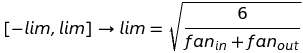

In [ ]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
        r_out = tf.nn.relu(c_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
        f_out = tf.reshape(p_out, [x.shape[0], -1])
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [ ]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = x ** 3 + 2 * x + 5

# 그래디언트를 계산합니
print(tape.gradient(y, x))

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


In [ ]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = tf.nn.softmax(x)

# 그래디언트를 계산합니다.
print(tape.gradient(y, x))

tf.Tensor([9.99540153e-18 2.71703183e-17 7.38565826e-17], shape=(3,), dtype=float64)


In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [ ]:
x_train.shape

(48000, 28, 28, 1)

In [ ]:
x_train = x_train / 255
x_val = x_val / 255

In [ ]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

In [ ]:
import matplotlib.pyplot as plt

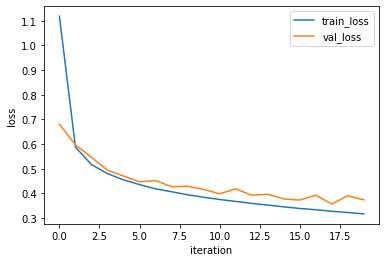

In [ ]:
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
cn.score(x_val, y_val_encoded)

0.8674166666666666

## 합성곱 신경망 모델(Keras)
* 배치 차원이 None인 이유는 배치 입력의 개수는 훈련할 때 전달되는 샘플 개수에 따라 달라지기 때문이다.
* 모델의 파라미터 개수는 전체 가중치의 크기와 커널마다 하나씩 절편을 추가하여 계산된다.

* 드롭아웃
  * 신경망의 과대 적합을 줄이는 방법중 하나이다.
  * 드롭아웃은 무작위로 신경망에서 하나의 뉴런을 비활성화시킨다.
  * 무작위로 일부 뉴런을 비활성화 시키면 특정 뉴런에 과도하게 의존하여 훈련하는 것을 막아준다.
  * 일부 뉴런이 비 활성화 되었을때도 예측을 잘 하려면 특정 뉴런에 과도하게 의존하지 않고 모든 뉴런이 의미있는 패턴을 학습해야 한다.
  드롭아웃은 모델을 훈련시킬 때만 적용하는 기법으로 테스트나 실전에는 사용하지 않는다.
  * 이로 인해 상대적으로 테스트와 실전의 출력값이 훈련할 때의 출력값보다 높아지므로 테스트나 실전에서는 출력값을 드롭아웃 비율만큼 낮춰야 한다.
 * 하지만 텐서플로를 비롯한 대부분의 딥러닝 프레임워크들은 이 문제를 반대로 해결한다. 즉, 훈련할 때 드롭아웃 비율만큼 뉴런의 출력을 높여 훈련 시킨다.

* 분류 문제에서 정확도를 직접 최적화할 수는 없다. 대신 크로스 엔트로피 손실 함수를 대신 최적화 한다.
* 손실 함수를 최소화하면 정확도가 높아질 것으로 기대할 수 있지만 반그시 그렇지는 않다.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [ ]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4360 - accuracy: 0.8451 - val_loss: 0.3158 - val_accuracy: 0.8855
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2987 - accuracy: 0.8920 - val_loss: 0.2865 - val_accuracy: 0.8974
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2569 - accuracy: 0.9055 - val_loss: 0.2629 - val_accuracy: 0.9071
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2270 - accuracy: 0.9166 - val_loss: 0.2501 - val_accuracy: 0.9122
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2041 - accuracy: 0.9239 - val_loss: 0.2425 - val_accuracy: 0.9146
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1821 - accuracy: 0.9329 - val_loss: 0.2479 - val_accuracy: 0.9131
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1635 - accuracy: 0.9406 - val_loss: 0.2478 - val_accuracy:

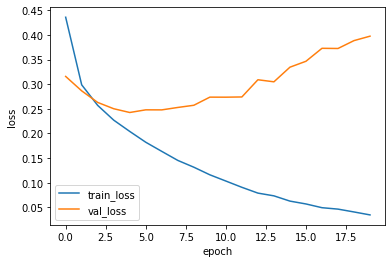

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

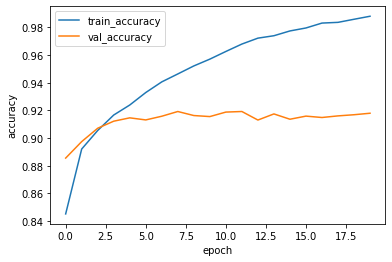

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = conv1.evaluate(x_val, y_val_encoded, verbose=0)

In [ ]:
print(accuracy)

0.9179166555404663


In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [ ]:
conv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [ ]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5120 - accuracy: 0.8153 - val_loss: 0.3606 - val_accuracy: 0.8722
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3745 - accuracy: 0.8654 - val_loss: 0.3153 - val_accuracy: 0.8872
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3349 - accuracy: 0.8768 - val_loss: 0.2837 - val_accuracy: 0.8975
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3064 - accuracy: 0.8861 - val_loss: 0.2617 - val_accuracy: 0.9055
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2855 - accuracy: 0.8935 - val_loss: 0.2745 - val_accuracy: 0.9002
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2708 - accuracy: 0.8989 - val_loss: 0.2488 - val_accuracy: 0.9076
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2612 - accuracy: 0.9032 - val_loss: 0.2397 - val_accuracy:

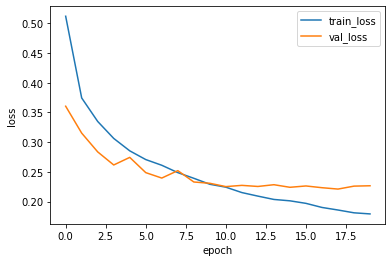

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

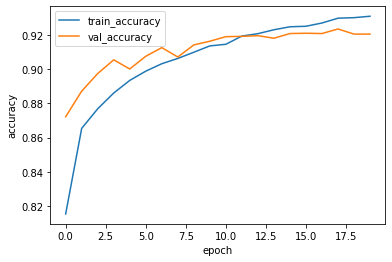

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = conv2.evaluate(x_val, y_val_encoded, verbose=0)

In [ ]:
print(accuracy)

0.9205833077430725
